In [3]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [5]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [6]:
original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [7]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(original_path, "best_state", "components", "ast_encoder_params.json")).read())


In [27]:
ast_encoder = ast_model.ASTEncoder(model_params)
ast_encoder.load(os.path.join(original_path, "best_state", "components"))

In [9]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
batcher.load_from_attribution_batcher(original_path)
# batcher.load_from_attribution_batcher("../authorship_attribution/experiments/GCJ-108/regularized-sep-coef-names/")
# batcher.load(original_path)

In [10]:
# batcher.train_data

In [11]:
# data = ast_utilities.read_all_gcj()

In [12]:
# data = ast_utilities.filter_by_count(data, 15, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [13]:


obfuscation_params = {
    "max_patches_to_body":5,
    "modify_add_patches":0.5,
    "max_frac_to_insert":0.3,
#     'max_n_insertions':5,
    "add_functions":False
}



In [14]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

Train:
0.0
0.0
0.8731481481481481


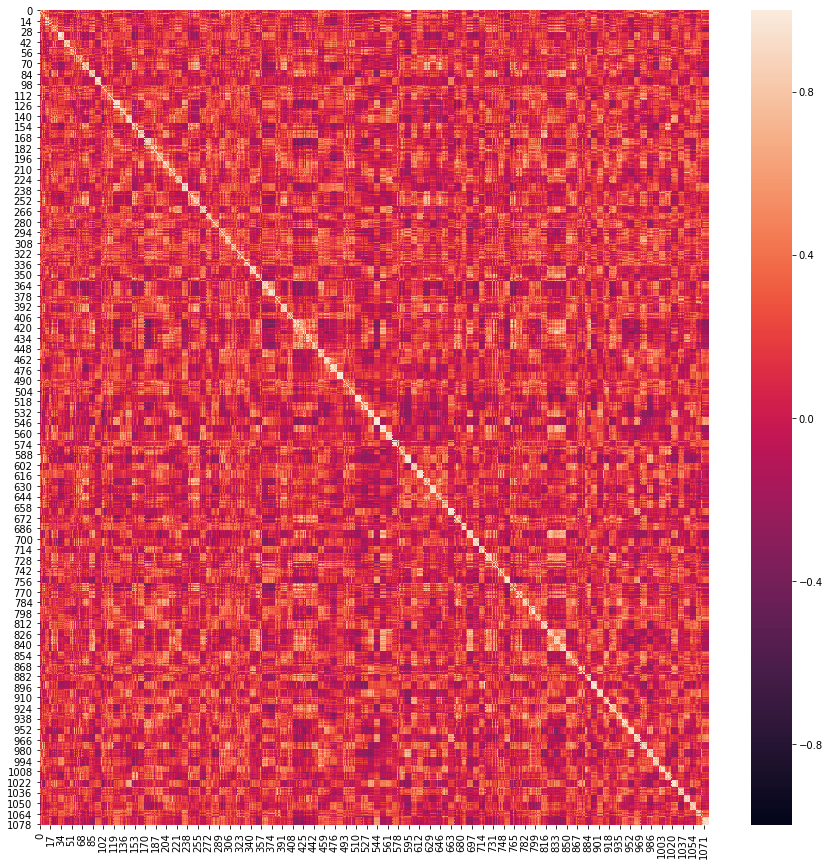

Test:
0.0
0.0
0.6216490299823635


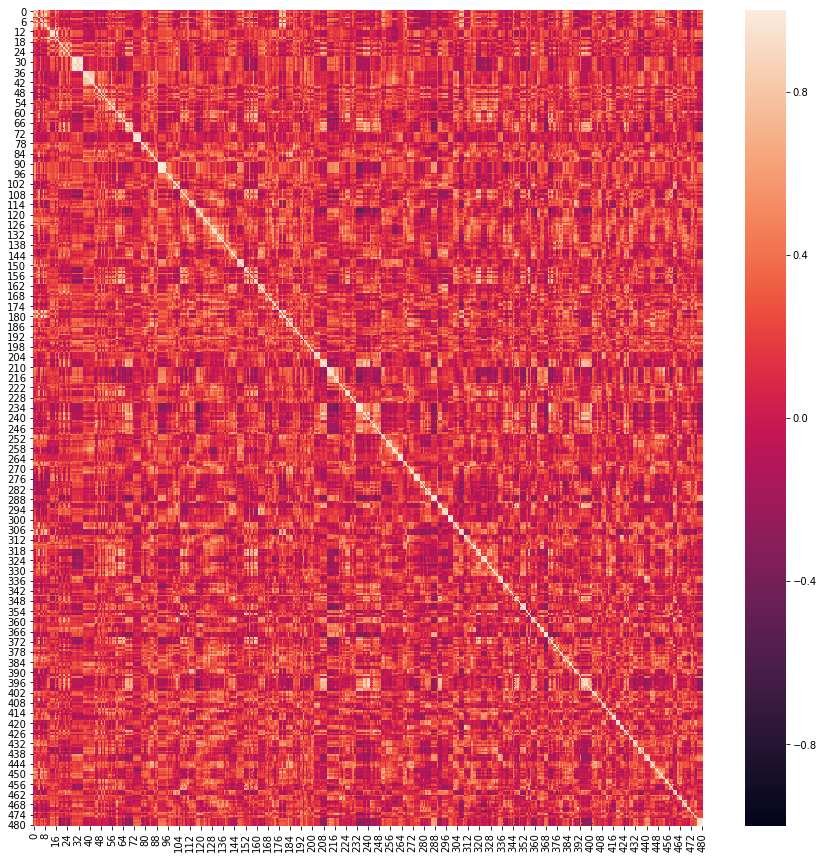

In [13]:
obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=10, n_obfuscated=0)

In [15]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    n_samples_for_adversarial = 3,
    adversarial_coef = 1
)


In [16]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [18]:
path = "./experiments/gcj_108_108/pure/no_names_mixing"
if os.path.exists(path):
    raise ValueError()

ValueError: 

In [28]:
trainer = obfuscated_trainer.MixingTrainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [29]:
# trainer.load(os.path.join(path, "last_state"))

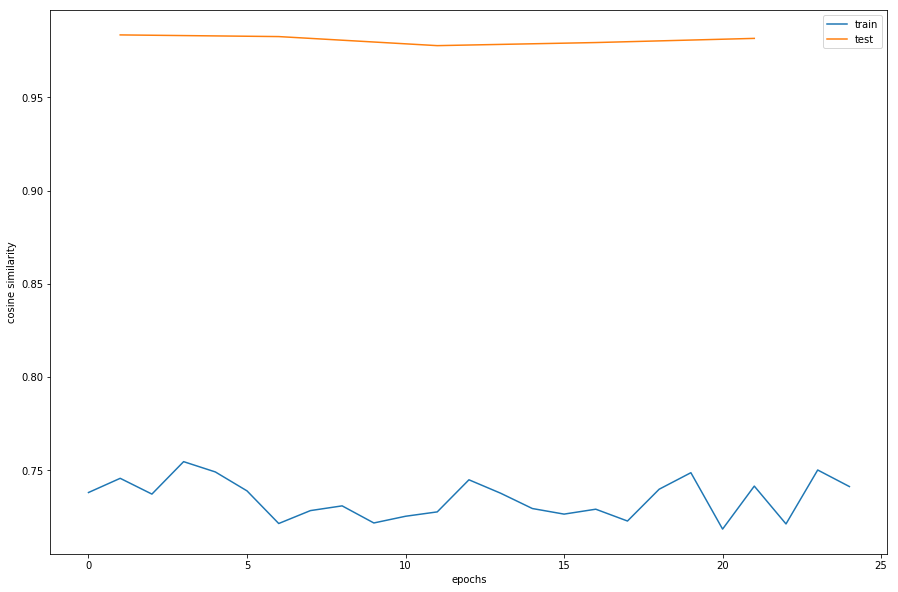

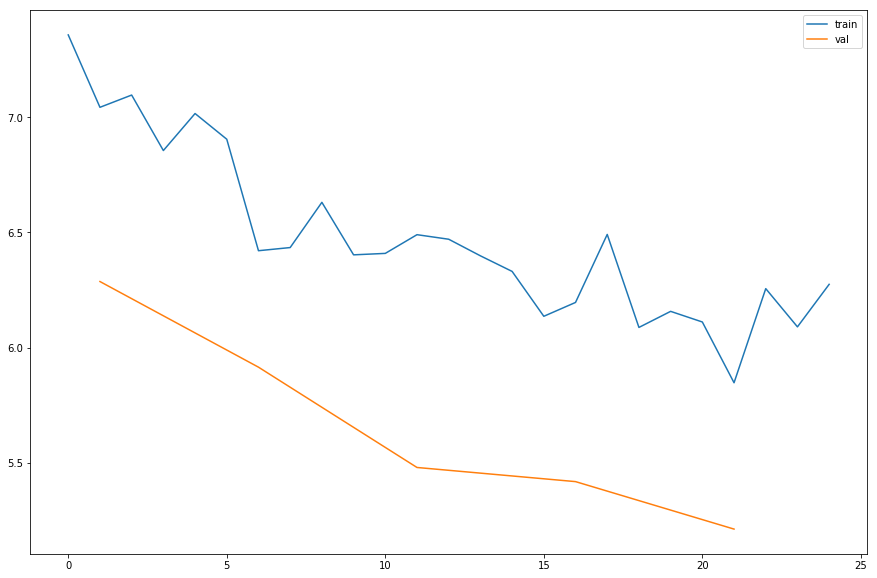

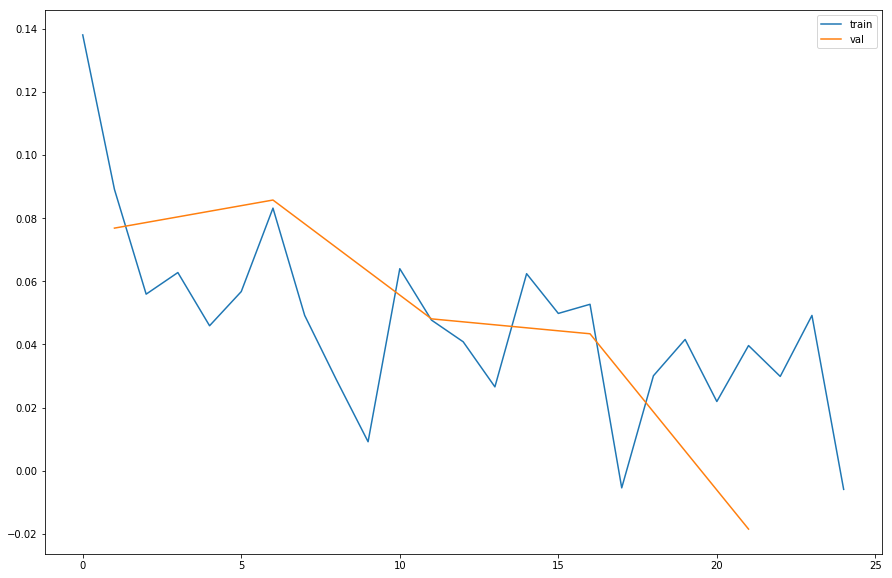

In [ ]:
trainer.train(batcher, trainer_params, obfuscation_params)

Train:
0.0
0.0
0.6027777777777779


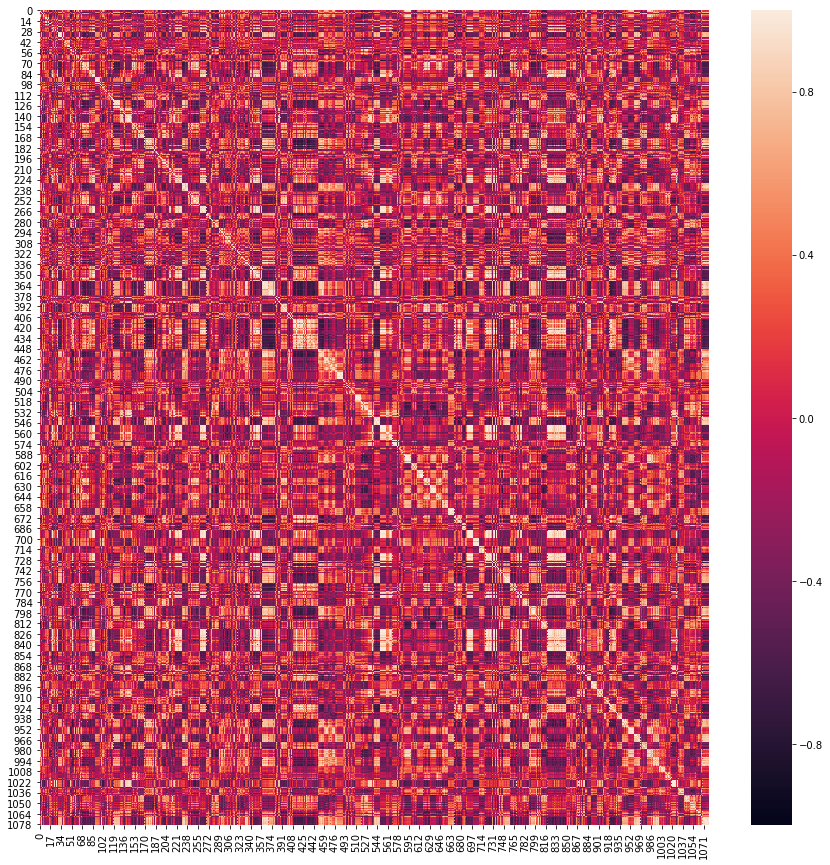

Test:
0.0
0.0
0.4147927689594357


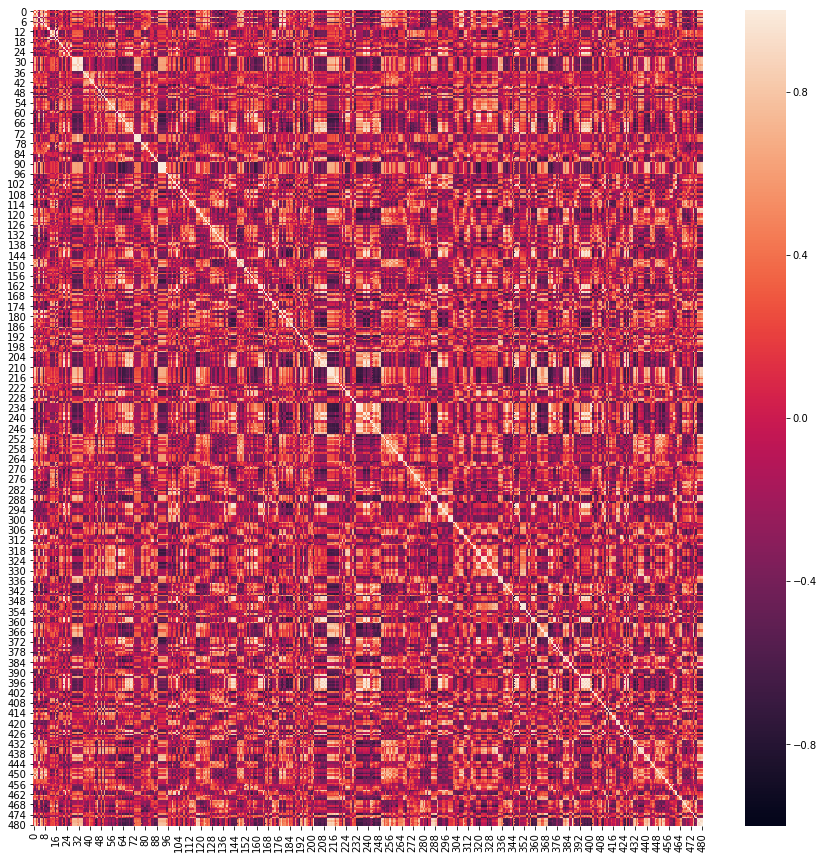

In [20]:
obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=10, n_obfuscated=0)

In [21]:
import gc
gc.collect()

11287